In [2]:
from azureml.core import Workspace
from azureml.core.model import InferenceConfig,Model
from azureml.core.environment import Environment
from azureml.core.webservice import AciWebservice,Webservice

import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient
from mlflow.models.signature import infer_signature

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.datasets import load_breast_cancer

from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
import json

In [3]:
ws = Workspace.from_config()
mlflow.set_tracking_uri(ws.get_mlflow_tracking_uri())

If you run your code in unattended mode, i.e., where you can't give a user input, then we recommend to use ServicePrincipalAuthentication or MsiAuthentication.
Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk.


In [4]:
# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 4. Dictionary to store model performances
model_performance = {}

In [6]:
# 5. List of algorithms to evaluate
algorithms = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

In [7]:
# Track metrics
accuracy_scores = []
f1_scores = []

/home/janak/Documents/Azure_MLops_Book/venv/lib/python3.10/site-packages/azureml/mlflow/_protos/aml_service_pb2.py:10: UserWarning: google.protobuf.service module is deprecated. RPC implementations should provide code generator plugins which generate code specific to the RPC implementation. service.py will be removed in Jan 2025
  from google.protobuf import service as _service



Training Random Forest...


Registered model 'cancer_random_forest' already exists. Creating a new version of this model...
2025/03/28 18:31:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: cancer_random_forest, version 6
Created version '6' of model 'cancer_random_forest'.


Random Forest - Accuracy: 0.9649
🏃 View run Random Forest at: https://eastus2.api.azureml.ms/mlflow/v2.0/subscriptions/15d6b460-1d61-4813-914e-eb2d235bceb1/resourceGroups/Azure_ML/providers/Microsoft.MachineLearningServices/workspaces/Azure_ml/#/experiments/f4810b89-bb3f-4bd0-8577-92ea82b2f05f/runs/361bcbee-3323-416a-92a5-3a742a45f8dc
🧪 View experiment at: https://eastus2.api.azureml.ms/mlflow/v2.0/subscriptions/15d6b460-1d61-4813-914e-eb2d235bceb1/resourceGroups/Azure_ML/providers/Microsoft.MachineLearningServices/workspaces/Azure_ml/#/experiments/f4810b89-bb3f-4bd0-8577-92ea82b2f05f

Training Gradient Boosting...


Registered model 'cancer_gradient_boosting' already exists. Creating a new version of this model...
2025/03/28 18:32:28 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: cancer_gradient_boosting, version 6
Created version '6' of model 'cancer_gradient_boosting'.


Gradient Boosting - Accuracy: 0.9561
🏃 View run Gradient Boosting at: https://eastus2.api.azureml.ms/mlflow/v2.0/subscriptions/15d6b460-1d61-4813-914e-eb2d235bceb1/resourceGroups/Azure_ML/providers/Microsoft.MachineLearningServices/workspaces/Azure_ml/#/experiments/f4810b89-bb3f-4bd0-8577-92ea82b2f05f/runs/a5ffe855-8654-4791-966b-db7710823132
🧪 View experiment at: https://eastus2.api.azureml.ms/mlflow/v2.0/subscriptions/15d6b460-1d61-4813-914e-eb2d235bceb1/resourceGroups/Azure_ML/providers/Microsoft.MachineLearningServices/workspaces/Azure_ml/#/experiments/f4810b89-bb3f-4bd0-8577-92ea82b2f05f

Training SVM...


Registered model 'cancer_svm' already exists. Creating a new version of this model...
2025/03/28 18:32:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: cancer_svm, version 8
Created version '8' of model 'cancer_svm'.


SVM - Accuracy: 0.9474
🏃 View run SVM at: https://eastus2.api.azureml.ms/mlflow/v2.0/subscriptions/15d6b460-1d61-4813-914e-eb2d235bceb1/resourceGroups/Azure_ML/providers/Microsoft.MachineLearningServices/workspaces/Azure_ml/#/experiments/f4810b89-bb3f-4bd0-8577-92ea82b2f05f/runs/3896581e-1a9b-4ea8-a47b-588d64133717
🧪 View experiment at: https://eastus2.api.azureml.ms/mlflow/v2.0/subscriptions/15d6b460-1d61-4813-914e-eb2d235bceb1/resourceGroups/Azure_ML/providers/Microsoft.MachineLearningServices/workspaces/Azure_ml/#/experiments/f4810b89-bb3f-4bd0-8577-92ea82b2f05f


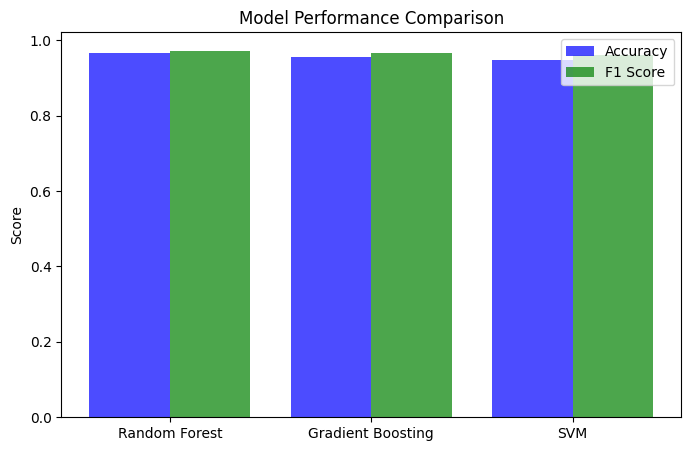


*************************
Best Model: Random Forest with Accuracy: 0.9649


Registered model 'best_cancer_model' already exists. Creating a new version of this model...
2025/03/28 18:33:08 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: best_cancer_model, version 8
Created version '8' of model 'best_cancer_model'.



✅ Successfully registered best model: Random Forest as 'best_cancer_model'

Parent Run ID: a9315b2d-673e-4bbb-aed3-e49f111dadd5
🏃 View run maroon_quill_nrpltj1n at: https://eastus2.api.azureml.ms/mlflow/v2.0/subscriptions/15d6b460-1d61-4813-914e-eb2d235bceb1/resourceGroups/Azure_ML/providers/Microsoft.MachineLearningServices/workspaces/Azure_ml/#/experiments/f4810b89-bb3f-4bd0-8577-92ea82b2f05f/runs/a9315b2d-673e-4bbb-aed3-e49f111dadd5
🧪 View experiment at: https://eastus2.api.azureml.ms/mlflow/v2.0/subscriptions/15d6b460-1d61-4813-914e-eb2d235bceb1/resourceGroups/Azure_ML/providers/Microsoft.MachineLearningServices/workspaces/Azure_ml/#/experiments/f4810b89-bb3f-4bd0-8577-92ea82b2f05f


In [ ]:
# Start MLflow run
with mlflow.start_run() as run:
    mlflow.log_params({"dataset": "breast_cancer", "test_size": 0.2, "random_state": 42})
    
    model_performance = {}
    best_model_uri = None
    best_model_name = None
    best_accuracy = 0.0
    accuracy_scores = []
    f1_scores = []

    # Train and evaluate each algorithm
    for algo_name, model in algorithms.items():
        print(f"\nTraining {algo_name}...")
        
        try:
            with mlflow.start_run(nested=True, run_name=algo_name) as nested_run:
                model.fit(X_train, y_train)
                predictions = model.predict(X_test)
                accuracy = accuracy_score(y_test, predictions)
                f1 = f1_score(y_test, predictions)
                
                mlflow.log_metric("accuracy", accuracy)
                mlflow.log_metric("f1_score", f1)
                mlflow.log_params(model.get_params())
                mlflow.set_tag("algorithm", algo_name)
                
                artifact_path = f"{algo_name.lower().replace(' ', '_')}_model"
                registered_model_name = f"cancer_{algo_name.lower().replace(' ', '_')}"

                # Define Input Example & Signature
                input_example = X_train[:1]  # Example input
                signature = infer_signature(X_train, model.predict(X_train))  # Model signature
                
                model_uri = mlflow.sklearn.log_model(
                    sk_model=model,
                    artifact_path=artifact_path,
                    registered_model_name=registered_model_name,
                    input_example=input_example,
                    signature=signature
                )
                
                model_performance[algo_name] = accuracy
                print(f"{algo_name} - Accuracy: {accuracy:.4f}")
                
                # Store metrics
                accuracy_scores.append(accuracy)
                f1_scores.append(f1)
                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model_uri = model_uri.model_uri
                    best_model_name = algo_name
                    
        except Exception as e:
            print(f" Error in {algo_name} run: {e}")
    
    # Create comparison graph
    x_labels = list(algorithms.keys())
    x = np.arange(len(x_labels))
    
    plt.figure(figsize=(8, 5))
    plt.bar(x - 0.2, accuracy_scores, width=0.4, label="Accuracy", color='blue', alpha=0.7)
    plt.bar(x + 0.2, f1_scores, width=0.4, label="F1 Score", color='green', alpha=0.7)
    
    plt.xticks(x, x_labels)
    plt.ylabel("Score")
    plt.title("Model Performance Comparison")
    plt.legend()

    # Log the figure in MLflow
    mlflow.log_figure(plt.gcf(), "model_comparison.png")

    # Show plot
    plt.show()
    
    # Log best model details
    if best_model_uri:
        print("\n*************************")
        print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")
        mlflow.log_metric("best_accuracy", best_accuracy)
        mlflow.log_param("best_algorithm", best_model_name)
        
        # Register best model as 'best_cancer_model'
        try:
            mlflow.register_model(model_uri=best_model_uri, name="best_cancer_model")
            print(f"\nSuccessfully registered best model: {best_model_name} as 'best_cancer_model'")
        except Exception as e:
            print(f" Failed to register best model: {e}")
    else:
        print("No valid models were trained.")
    
    print(f"\nParent Run ID: {run.info.run_id}")


In [10]:
env = Environment(name="azure_mlflow")
env.python.conda_dependencies.add_pip_package("mlflow")
env.python.conda_dependencies.add_pip_package("scikit-learn")

inference_config = InferenceConfig(entry_script="score_azure_mlflow.py", environment=env)

model = Model(ws, "best_cancer_model")
deployment_config = AciWebservice.deploy_configuration(cpu_cores=1, memory_gb=1)

service = Model.deploy(ws, "mlflow-azure", [model], inference_config, deployment_config)
service.wait_for_deployment(show_output=True)


/tmp/ipykernel_40189/2790211990.py:10: FutureWarning: azureml.core.model:
To leverage new model deployment capabilities, AzureML recommends using CLI/SDK v2 to deploy models as online endpoint, 
please refer to respective documentations 
https://docs.microsoft.com/azure/machine-learning/how-to-deploy-managed-online-endpoints /
https://docs.microsoft.com/azure/machine-learning/how-to-attach-kubernetes-anywhere 
For more information on migration, see https://aka.ms/acimoemigration 
To disable CLI/SDK v1 deprecation warning set AZUREML_LOG_DEPRECATION_WARNING_ENABLED to 'False'
  service = Model.deploy(ws, "mlflow-azure", [model], inference_config, deployment_config)


Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2025-03-28 19:06:34+05:45 Creating Container Registry if not exists.
2025-03-28 19:06:37+05:45 Use the existing image.
2025-03-28 19:06:41+05:45 Submitting deployment to compute.
2025-03-28 19:06:48+05:45 Checking the status of deployment mlflow-azure..
2025-03-28 19:08:10+05:45 Checking the status of inference endpoint mlflow-azure.
Succeeded
ACI service creation operation finished, operation "Succeeded"
